In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_raw = cv2.imread("murakami.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img_raw, (720, 520))  

# Turn on camera
cap = cv2.VideoCapture(0)

# Features
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img, None)

# Feature matching
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

while True:
    _, frame = cap.read()
    grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # trainimage

    kp_grayframe, desc_grayframe = sift.detectAndCompute(grayframe, None)
    matches = flann.knnMatch(des, desc_grayframe, k=2)

    good_points = []
    for m, n in matches:
        if m.distance < 0.6*n.distance:
            good_points.append(m)

    img3 = cv2.drawMatches(img, kp, grayframe, kp_grayframe, good_points, grayframe)
    cv2.imshow("img3", img3)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

The image was moving so fast because it is a video. Therefore, it is so hard to capture all the points at the same time


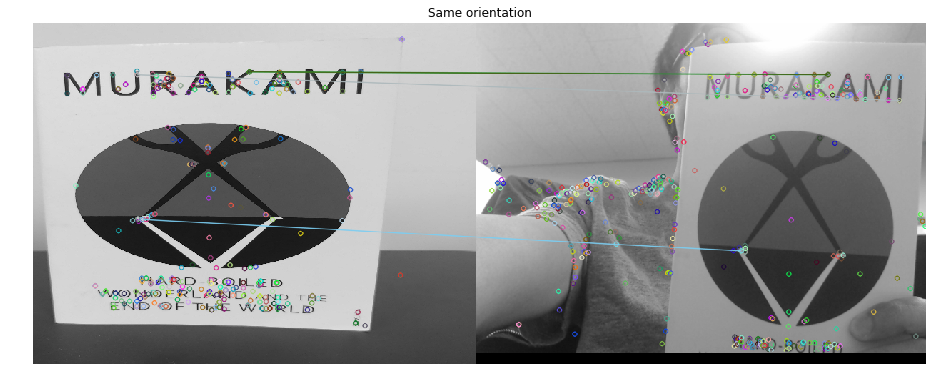

In [3]:
print("The image was moving so fast because it is a video. Therefore, it is so hard to capture all the points at the same time")
img = cv2.imread("result1.png") # queryiamge

plt.rcParams['figure.figsize'] = (16,9)
plt.title("Same orientation")
plt.axis('off')
plt.imshow(img)

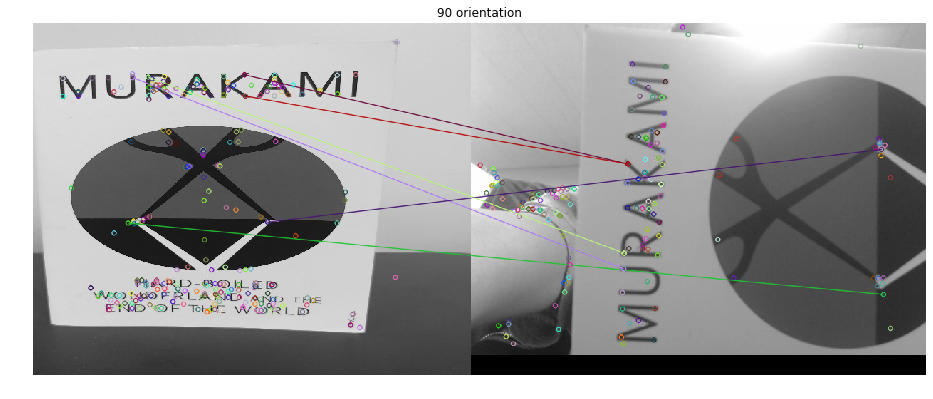

In [4]:
img = cv2.imread("result2.png") # queryiamge

plt.rcParams['figure.figsize'] = (16,9)
plt.title("90 orientation")
plt.axis('off')
plt.imshow(img)

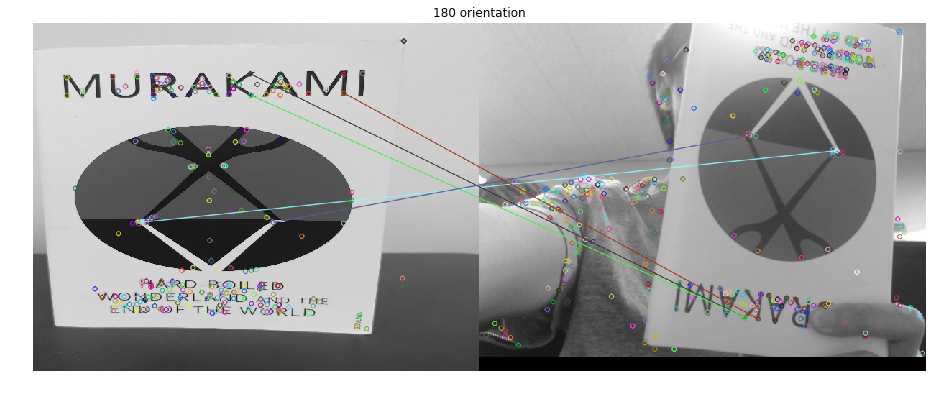

In [5]:
img = cv2.imread("result3.png") # queryiamge

plt.rcParams['figure.figsize'] = (16,9)
plt.title("180 orientation")
plt.axis('off')
plt.imshow(img)